<a href="https://colab.research.google.com/github/bajpaidevharsh/medical_insurance_regression/blob/main/medical_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas
import numpy
import matplotlib.pyplot

In [5]:
dev=pandas.read_csv('/content/insurance.csv')
dev.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [6]:
 dev.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
smoke=[]
for i in dev['smoker']:
  if i == 'yes':
    smoke.append(1)
  else:
    smoke.append(0)
dev['smoker']=smoke

In [8]:
dev.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [9]:
sex=[]
for i in dev['sex']:
  if i == 'male':
    sex.append(1)
  else:
    sex.append(0)
dev['sex']=sex

In [10]:
region=[]
for i in dev['region']:
  if i == 'northwest':
    region.append(1)
  elif i == 'southwest':
    region.append(2)
  elif i == 'southeast':
    region.append(3)
  else:
    region.append(4)
dev['region']=region

In [11]:
dev.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,3,3756.62160
6,46,0,33.440,1,0,3,8240.58960


In [12]:
correlation=dev.corr()

In [13]:
correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002613,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.009346,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.054428,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.036617,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.044124,0.787251
region,-0.002613,0.009346,0.054428,-0.036617,0.044124,1.000000,0.050226
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.050226,1.000000


In [14]:
correlation['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region      0.050226
Name: charges, dtype: float64

In [15]:
factor_to_be_removed=['region','sex','children']

In [16]:
for j in factor_to_be_removed:
  del dev[j]

In [17]:
dev

,age,bmi,smoker,charges
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [18]:
harsh=dev.charges
dev.drop('charges',axis=1,inplace=True)

**normalization**

In [19]:
for i in dev.columns:
  dev[i]=(dev[i]/dev[i].max())

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(dev,harsh,test_size=0.2)

**after normalization**

In [22]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'smoker')

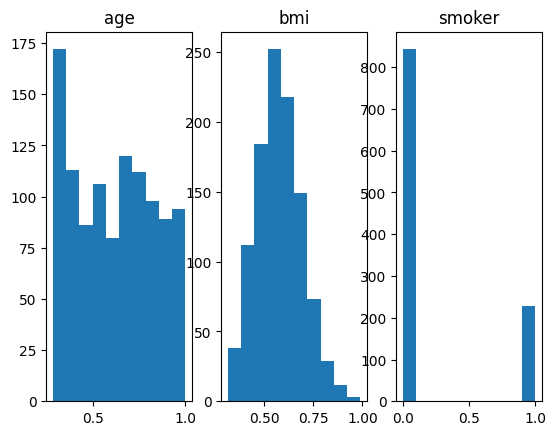

In [23]:
dev,(harsh1,harsh2,harsh3)=matplotlib.pyplot.subplots(ncols=3,nrows=1)
harsh1.hist(xtrain['age'])
harsh2.hist(xtrain['bmi'])
harsh3.hist(xtrain['smoker'])
harsh1.set_title('age')
harsh2.set_title('bmi')
harsh3.set_title('smoker')

**SGD Regressor**

In [24]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
model1= make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))
model1.fit(xtrain, ytrain)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [25]:
model1_score=model1.score(xtest,ytest)

In [26]:
model1_score

0.7185493576492381

**Lasso**

In [27]:
from sklearn import linear_model
model2 = linear_model.Lasso(alpha=0.1)
model2.fit(xtrain,ytrain)

Lasso(alpha=0.1)

In [28]:
model2_score=model2.score(xtest,ytest)

In [29]:
model2_score

0.7191056010635297

**ElasticNet**

In [30]:
from sklearn.linear_model import ElasticNet
model3= ElasticNet(alpha=0.1)
model3.fit(xtrain,ytrain)

ElasticNet(alpha=0.1)

In [31]:
model3_score=model3.score(xtest,ytest)

In [32]:
model3_score

0.6571593805481214

**RandomForest**

In [33]:
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor()
model4.fit(xtrain,ytrain)

RandomForestRegressor()

In [34]:
model4_score=model4.score(xtest,ytest)

In [35]:
model4_score

0.764864662302017

**Random Forest with hyper parameter tuning**

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
grid={'n_estimators':[10,20,30,40,50,60,70,80,90,100],
'max_depth':[1,2,3,4,5,6,7,8,9,10],
'min_samples_split':[2,3,4,5,6,7,8,9,10],
'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
'max_features':['auto','sqrt','log2']}

In [38]:
ee=RandomizedSearchCV(estimator=model4,param_distributions=grid,n_iter=100,cv=5,verbose=2)

In [39]:
ee.fit(xtrain,ytrain)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=80; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=40; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=4, n_estimators=40; total time=   0.1s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=70; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=5, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=9, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=70; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=70; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=9, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=90; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=30; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=30; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_lea

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.4s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.3s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_samples_leaf=1, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END max_depth=1, max_features=log2, min_sample

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=30; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=30; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=30; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, n_estimators=30; total time=   0.0s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=9, n_estimators=60; total time=   0.1s
[CV] END max_depth=7, max_features=sqrt, min_samples_lea

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=6, min_samples_split=4, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_l

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=9, max_features=auto, min_samples_leaf=7, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=8, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=40; total time=   0.1s
[CV] END max_depth=7, max_features=log2, min_samples_leaf=6, min_samples_split=9, n_estimators=40; total time=   0.1s
[CV] END max_depth=7, max_features=log2, min_samples_lea

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70; total time=   0.1s
[CV] END max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=7, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=70; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, n_estimators=60; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   0.2s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=9, n_estimators=50; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=80; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=7, n_estimators=80; total time=   0.2s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=7, n_estimators=80; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.2s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=4, n_estimators=90; total time=   0.1s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, max_features=sqrt, min_samples_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=30; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=9, n_estimators=30; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=8, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_sample

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=80; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=8, n_estimators=40; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=10, min_samples_split=6, n_estimators=40; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=7, min_samples_split=8, n_estimators=40; total time=   0.1s
[CV] END max_depth=5, max_features=sqrt, min_sample

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=7, n_estimators=100; total time=   0.2s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=100; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=10, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=70; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=70; total time=   0.2s
[CV] END max_depth=6, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=70; total time=   0.1s
[CV] END max_depth=6, max_features=log2, min_sa

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.6s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.2s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=90; total time=   0.2s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=6, n_estimators=50; total time=   0.1s
[CV] END max_depth=3, max_features=log2, min_samples_lea

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=60; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=6, n_estimators=80; total time=   0.1s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=3, n_estimators=10; total time=   0.0s
[CV] END max_depth=4, max_features=log2, min_sample

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.1s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=60; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=2, max_features=auto, min_samples_leaf=8, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=10; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=6, min_samples_split=9, n_estimators=50; total time=   0.1s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=9, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_sample

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END max_depth=6, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=30; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=2)

In [40]:
ee.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 4}

In [54]:
from sklearn.ensemble import RandomForestRegressor
model5=RandomForestRegressor(n_estimators=100,
 min_samples_split=7,
 min_samples_leaf=4,
 max_features='auto',
 max_depth=4)
model5.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=4, max_features='auto', min_samples_leaf=4,
                      min_samples_split=7)

In [55]:
model5_score=model5.score(xtest,ytest)

In [56]:
model5_score

0.8216736549780632

**ANN**

In [44]:
import tensorflow

In [45]:
model=tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(164,activation='relu'),
    tensorflow.keras.layers.Dense(128,activation='relu'),
    tensorflow.keras.layers.Dense(164,activation='relu'),
    tensorflow.keras.layers.Dense(32,activation='relu'),
    tensorflow.keras.layers.Dense(1,activation='linear')
])

In [46]:
model.compile(optimizer=tensorflow.keras.optimizers.Adam(),loss='mean_absolute_error',metrics=['mean_squared_error'])

In [47]:
model.fit(xtrain,ytrain,epochs=200,validation_data=(xtest,ytest))

Epoch 1/200
34/34 [==============================] - 2s 10ms/step - loss: 13467.4092 - mean_squared_error: 332325248.0000 - val_loss: 12440.4883 - val_mean_squared_error: 282668864.0000
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13294.0166 - mean_squared_error: 327137408.0000 - val_loss: 11875.5859 - val_mean_squared_error: 266818880.0000
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 11292.0352 - mean_squared_error: 267660784.0000 - val_loss: 7813.8521 - val_mean_squared_error: 155782544.0000
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7322.7490 - mean_squared_error: 131171624.0000 - val_loss: 6267.7734 - val_mean_squared_error: 88323912.0000
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 6557.0156 - mean_squared_error: 103773160.0000 - val_loss: 5834.9316 - val_mean_squared_error: 75444224.0000
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 5999.066

In [48]:
model.evaluate(xtest,ytest)

9/9 [==============================] - 0s 2ms/step - loss: 2409.6953 - mean_squared_error: 28036416.0000


[2409.6953125, 28036416.0]

In [49]:
ytrain.mean()

13472.4193694757

In [57]:
(2409/13472)*100

17.881532066508314

In [59]:
100-(2409/13472)*100

82.11846793349169

In [60]:
tp={'model1':model1_score,'model2':model2_score,'model3':model3_score,'model4':model4_score,'model5':model5_score,'model_ann':82.7925}

In [61]:
pandas.DataFrame(tp,index=['score'])

,model1,model2,model3,model4,model5,model_ann
score,0.718549,0.719106,0.657159,0.764865,0.821674,82.7925


**therefore ANN performs the best**